In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report

In [2]:
df = pd.read_csv('data/gender_classification_v7.csv')

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

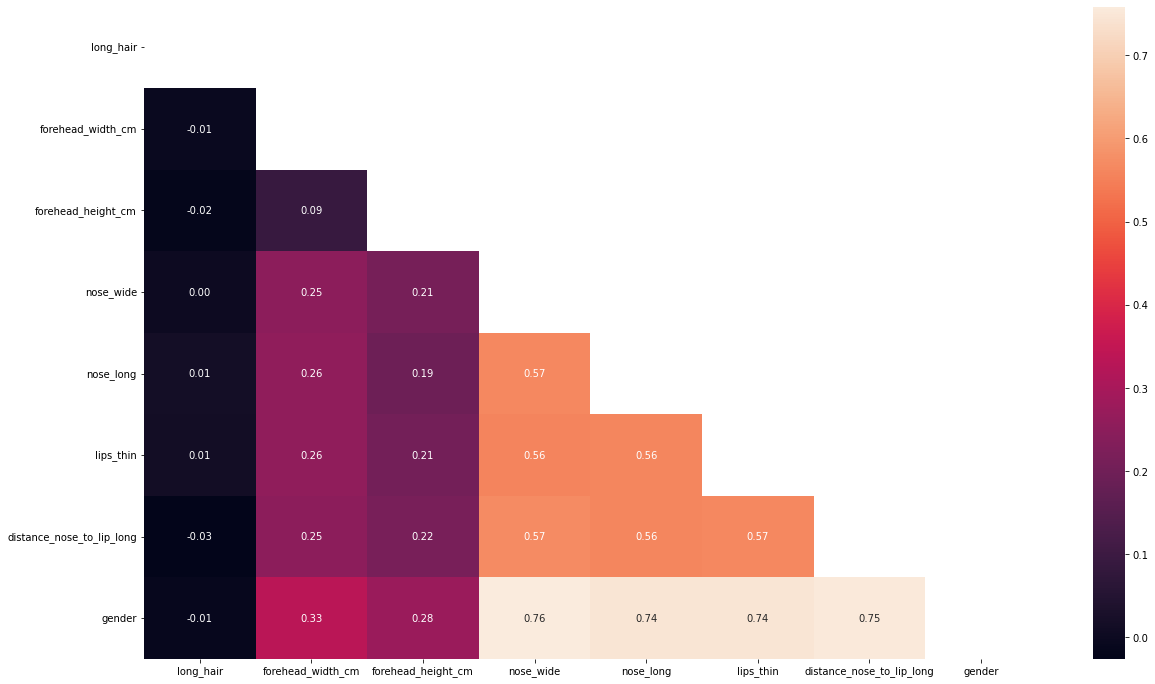

In [7]:
plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask,  annot = True, fmt = ".2f")
plt.show()

In [14]:
X = df[['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long' ]]
y = np.array(df[['gender']]).reshape(-1,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [19]:
LR = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
print('yhat:',yhat)
print('y_test:',y_test)

yhat: [1 1 0 ... 0 0 1]
y_test: [1 1 0 ... 0 0 0]


In [22]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

0.8942115768463074

In [23]:
jaccard_score(y_test, yhat,pos_label=0)

array([[0.23420053, 0.76579947],
       [0.06833971, 0.93166029],
       [0.93037563, 0.06962437],
       ...,
       [0.82580599, 0.17419401],
       [0.93068345, 0.06931655],
       [0.16383093, 0.83616907]])

In [30]:
cm = confusion_matrix(y_test, yhat, labels=[1,0])
cm

array([[500,  21],
       [ 32, 448]], dtype=int64)

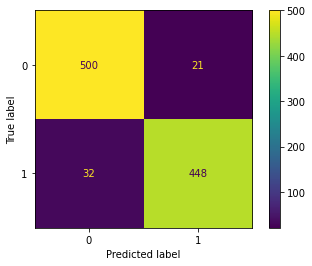

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [42]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       480
           1       0.94      0.96      0.95       521

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001

